# NLP Homework 1 - Comparing Corpora with Corpus Statistics

* Name: Sathish Kumar Rajendiran
* Homework: 1| debate 2020 Trump vs Biden
* Date: 10/18/2020
* Class: 2020-0930 IST 664- Natural Language Processing


# Documents Compared
##### 1) 2020- Presidential Debate 1- Complete Transcript 
##### 2) 2016- Presidential Debate 1- Complete Transcript

# Analysis Questions and Sources
##### 1) What is the major topic discussed in 2020 1st Presidential Debate?
##### 2) What is the major topic discussed in 2016 1st Presidential Debate?
##### 3) What is inferred from last two elections major topics?
##### 4) Topics that almost decided the campaign success?
##### 5) Who are the candidates?

# Sources
### 1. 2020- Presidential Debate 1- Full Transcript
Read the full transcript from the first presidential debate between Joe Biden and Donald Trump

By USA TODAY Staff 09/30/2020 01:10 PM EDT 
https://www.usatoday.com/story/news/politics/elections/2020/09/30/presidential-debate-read-full-transcript-first-debate/3587462001/

### 2. 2016 - Presidential Debate 1 - Full Transcript
Read the first presidential debate between Donald J Trump and Hillary Clinton

By POLITICO STAFF 09/27/2016 01:55 AM EDT
https://www.politico.com/story/2016/09/full-transcript-first-2016-presidential-debate-228761

# Loading and Cleaning the Data

* It’s plain text so there is no markup to parse.
* There’s punctuation like commas, apostrophes, quotes, question marks, and more.
* There’s hyphenated descriptions like “armour-like”.
* There are names

# Import necessary libraries

In [1]:
#import libraries

# standard library
import os
import sys
from datetime import datetime
import time

# csv, xls, pdf, pandas & json
import pandas as pd
import json
import csv
import xlrd

# Language Processing
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

# setup to process bigrams and ngrams
from nltk.collocations import *

##  Regular Expression to match non-alphabetic characters
import re
import string

#visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

os.getcwd()


'/Users/sathishrajendiran/ist664-nlp'

## Define re-usable function for text processing using regular expression
* Pattern to match word of non-alphabetical characters
* Words with internal hyphens or apostrophes
* look for special characters

In [2]:
#defining filters using regular expression

def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if(pattern.match(w)):
        return True
    else:
        return False

In [3]:
#defining filters using regular expression

def words_filter(w):
    # words with internal hyphens or apostrophes
    pattern = re.compile(' \w+(?:-\w+)*') 
    if(pattern.match(w)):
        return True
    else:
        return False

In [4]:
def special_filter(w):
    # look for special characters
    pattern = re.compile('[''\".?!,:;/]+') 
    if(pattern.match(w)):
        return True
    else:
        return False

## Tokenization with NLTK
* Import text files into rawText
* Tokenization using word_tokenize function from NLTK library
* Tokens to word corpus
* Sample search to test tokens

## 2020 - 1st Presidential Debate | Process and Tokenization of Raw Text

In [5]:
# Working with 2020- Presidential Debate 1- Full Transcript
try: 
    debatefile_2020 = open('/Users/sathishrajendiran/ist664-nlp/presidential_debate_2020.txt', 'r')
    rawText_2020 = debatefile_2020.read()
    print('length of raw text is:',len(rawText_2020))
    
except:
    print("Is the file in correct directory?")
    
debateTokens_2020 = nltk.word_tokenize(rawText_2020)
debateText_2020 = nltk.Text(debateTokens_2020)
debateText_2020.concordance('president')
#When we are done, we close the file.
debatefile_2020.close()

length of raw text is: 97372
Displaying 25 of 153 matches:
 of this transcript misstated what President Donald Trump said about the Democr
idential debate between Republican President Donald Trump and Democrat Joe Bide
f the presidential debates between President Donald J. Trump and former Vice Pr
nt Donald J. Trump and former Vice President Joe Biden . This debate is sponsor
e welcome the Republican nominee , President Trump , and the Democratic nominee
 and the Democratic nominee , Vice President Biden . ǝWALLACE Gentlemen , a lot
rst subject is the Supreme Court . President Trump you nominated Amy Coney Barr
onsider a nominee the court , Vice President Biden , you say that this is an ef
 say that this is an effort by the president and Republicans to jam through and
ice Barrett would take the court . President Trump , in this first segment you 
gment you go first . Two minutes . PRESIDENT DONALD TRUMP Thank you very much ,
ave the right to do it . ͗ WALLACE President Trump , Thank yo

## 2016 - 1st Presidential Debate | Process and Tokenization of Raw Text

In [6]:
# Working with 2016- Presidential Debate 1- Full Transcript
try: 
    debatefile_2016 = open('/Users/sathishrajendiran/ist664-nlp/presidential_debate_2016.txt', 'r')
    rawText_2016 = debatefile_2016.read()
    print('length of raw text is:',len(rawText_2016))
    
except:
    print("Is the file in correct directory?")
    
debateTokens_2016 = nltk.word_tokenize(rawText_2016)
debateText_2016 = nltk.Text(debateTokens_2016)
debateText_2016.concordance('president')
#When we are done, we close the file.
debatefile_2016.close()

length of raw text is: 92599
Displaying 25 of 27 matches:
andidates : Democratic nominee for president of the United States , Hillary Cli
inton , and Republican nominee for president of the United States , Donald J. T
at in my book ... TRUMP : So is it President Obama 's fault ? [ Interruption ] 
you even announced . TRUMP : Is it President Obama 's fault ? [ Interruption ] 
nces ... TRUMP : Secretary , is it President Obama 's fault ? [ Interruption ] 
her . Because we have -- we have a president that ca n't sit them around a tabl
oters will know if their potential president owes money to -- who he owes it to
or 40 years , everyone running for president has released their tax returns . Y
f your -- if your main claim to be president of the United States is your busin
n killed since Barack Obama became president . Over 4 -- almost 4,000 people in
 I prepared for ? I prepared to be president . And I think that 's a good thing
claim of the nation 's first black president was not a natural

## Cleaning with NLTK
* Convert to Lower case
* Apply Stop words from NLTK library
* Create custom stop words and apply those
* Remove Punctuations
* Retain tokens size greater than 2

## 2020 - 1st Presidential Debate | Cleaning data

In [7]:

# convert to lower case
# debateTokens = [w.lower() for w in debateTokens]

#change to lower case
filewords_2020 = [w.lower() for w in debateTokens_2020]

#remove punctuations
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in debateTokens_2020]

#store in filewords
filewords_2020 = [w for w in stripped if w.isalpha() and len(debateTokens_2020)>2]

from nltk.corpus import stopwords 

#Remove stop words from NLTK library
stop_words = set(stopwords.words('english')) 
filewords_2020 = [w for w in debateTokens_2020 if not w in stop_words] 

#prepare custom stop words
custom_stopwords =['ơ̹','ơ','ơͣ','ơǝ','ơǝǝ','ơǝ','ơ','ơͥ','ǝǝ','Ơ̜','Ơ̜','ve','gon','na','you'
                   ,'they','we','\'re','\'s','n\'t','\'ve','ơǝ']

# Apply Custom stop words
filewords_2020 = [w for w in debateTokens_2020 if not w in custom_stopwords] 




## 2016 - 1st Presidential Debate | Cleaning data

In [8]:
# convert to lower case
# debateTokens = [w.lower() for w in debateTokens]

#change to lower case
filewords_2016 = [w.lower() for w in debateTokens_2016]

#remove punctuations
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in debateTokens_2016]

#store in filewords
filewords_2016 = [w for w in stripped if w.isalpha() and len(debateTokens_2016)>2]

from nltk.corpus import stopwords 
#Remove stop words from NLTK library
stop_words = set(stopwords.words('english')) 
filewords_2016 = [w for w in debateTokens_2016 if not w in stop_words] 

#prepare custom stop words
custom_stopwords =['ơ̹','ơ','ơͣ','ơǝ','ơǝǝ','ơǝ','ơ','ơͥ','ǝǝ','Ơ̜','Ơ̜','ve','gon','na','you'
                   ,'they','we','\'re','\'s','n\'t','\'ve','ơǝ']
# Apply Custom stop words

filewords_2016 = [w for w in debateTokens_2016 if not w in custom_stopwords] 


### Preview first 100 words from each file

In [9]:
# display the first words
print ("Display first 100 words from 2020 Presidential debate file:")
print (filewords_2020[:50])

print ("\nDisplay first 100 words from 2016 Presidential debate file:")
print (filewords_2016[:50])

Display first 100 words from 2020 Presidential debate file:
['Correction', 'and', 'clarification', ':', 'A', 'prior', 'version', 'of', 'this', 'transcript', 'misstated', 'what', 'President', 'Donald', 'Trump', 'said', 'about', 'the', 'Democratic', 'Party', 'and', 'socialism', '.', 'This', 'is', 'the', 'full', 'transcript', 'from', 'Tuesday', 'night', 'first', 'presidential', 'debate', 'between', 'Republican', 'President', 'Donald', 'Trump', 'and', 'Democrat', 'Joe', 'Biden', '.', 'The', 'debate', 'was', 'moderated', 'by', 'Fox']

Display first 100 words from 2016 Presidential debate file:
['Full', 'transcript', ':', 'First', '2016', 'presidential', 'debate', 'By', 'POLITICO', 'STAFF', '09/27/2016', '01:55', 'AM', 'EDT', 'HOLT', ':', 'Good', 'evening', 'from', 'Hofstra', 'University', 'in', 'Hempstead', ',', 'New', 'York', '.', 'I', "'m", 'Lester', 'Holt', ',', 'anchor', 'of', '``', 'NBC', 'Nightly', 'News', '.', "''", 'I', 'want', 'to', 'welcome', 'to', 'the', 'first', 'presidential', 

### 2020 - 1st Presidential Debate | Top 50 Words by frequency

In [10]:
# Creating a frequency distribution of words
ndist_2020 = FreqDist(filewords_2020)
# print the top 50 tokens by frequency
nitems_2020 = ndist_2020.most_common(50)
print ("2020 - 1st Presidential Debate | Top 50 Words by frequency:")
for item in nitems_2020:
    print (item[0], '\t', item[1])

2020 - 1st Presidential Debate | Top 50 Words by frequency:
. 	 1202
, 	 1180
the 	 679
to 	 479
: 	 425
I 	 323
of 	 308
a 	 308
and 	 291
that 	 282
it 	 262
in 	 255
-- 	 239
is 	 196
have 	 193
‘ 	 167
TRUMP 	 154
͑ 	 149
he 	 143
do 	 137
people 	 133
BIDEN 	 122
WALLACE 	 121
what 	 118
And 	 116
? 	 116
be 	 112
͗ 	 109
President 	 108
You 	 104
going 	 99
on 	 98
are 	 96
not 	 96
about 	 95
this 	 93
He 	 92
̜ 	 91
with 	 83
ǝ 	 83
for 	 81
was 	 77
We 	 74
said 	 72
want 	 70
at 	 69
your 	 68
know 	 67
They 	 65
because 	 65


### 2016 - 1st Presidential Debate | Top 50 Words by frequency

In [11]:
# Creating a frequency distribution of words
ndist_2016 = FreqDist(filewords_2016)
# print the top 50 tokens by frequency
nitems_2016 = ndist_2016.most_common(50)
print ("2016 - 1st Presidential Debate | Top 50 Words by frequency:")
for item in nitems_2016:
    print (item[0], '\t', item[1])

2016 - 1st Presidential Debate | Top 50 Words by frequency:
, 	 1148
. 	 1116
the 	 588
to 	 569
I 	 458
and 	 347
that 	 338
of 	 337
a 	 313
: 	 307
have 	 263
it 	 242
in 	 224
And 	 178
is 	 161
do 	 149
TRUMP 	 121
are 	 117
was 	 115
be 	 114
-- 	 109
our 	 103
We 	 101
this 	 101
for 	 100
not 	 99
on 	 95
CLINTON 	 94
with 	 91
what 	 90
going 	 88
? 	 87
very 	 83
HOLT 	 82
at 	 82
about 	 77
think 	 76
country 	 72
people 	 71
But 	 69
because 	 66
he 	 66
them 	 64
would 	 64
as 	 60
will 	 59
been 	 56
has 	 56
You 	 56
said 	 55


## Setup to process bigrams

In [12]:
# setup to process bigrams
from nltk.collocations import *
# setup to process bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()

## 2020 - 1st Presidential Debate | BigramCollocationFinder

In [13]:
# additional stop words from a stop word file
fstop = open('Smart.English.stop', 'r')
stoptext = fstop.read()
fstop.close()

stopwords = nltk.word_tokenize(stoptext)
print ("Display first 10 Stopwords:")
print (stopwords[:10])

Display first 10 Stopwords:
['’', 's', 'a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across']


In [14]:

finder_2020 = BigramCollocationFinder.from_words(filewords_2020)

# choose to use both the non-alpha word filter and a stopwords filter
finder_2020.apply_word_filter(alpha_filter)
finder_2020.apply_word_filter(lambda w: w in stopwords)
finder_2020.apply_word_filter(words_filter)
finder_2020.apply_word_filter(special_filter)

## 2016 - 1st Presidential Debate | BigramCollocationFinder

In [15]:
finder_2016 = BigramCollocationFinder.from_words(filewords_2016)

# choose to use both the non-alpha word filter and a stopwords filter
finder_2016.apply_word_filter(alpha_filter)
finder_2016.apply_word_filter(lambda w: w in stopwords)
finder_2016.apply_word_filter(words_filter)

## 2020 - 1st Presidential Debate | Display the top 50 bigrams by Frequency

In [16]:
# score by frequency and display the top 50 bigrams
scored_2020 = finder_2020.score_ngrams(bigram_measures.raw_freq)
print ()
print ("Bigrams from file with top 50 frequencies")
for item in scored_2020[:50]:
        print (item)


Bigrams from file with top 50 frequencies
(('Vice', 'President'), 0.001657727937591419)
(('Mr.', 'President'), 0.0014139444173573866)
(('President', 'Trump'), 0.0013651877133105802)
(('President', 'Biden'), 0.0008288639687957094)
(('American', 'people'), 0.0006338371526084836)
(('Mr.', 'Vice'), 0.0004388103364212579)
(('United', 'States'), 0.0004388103364212579)
(('health', 'care'), 0.0004388103364212579)
(('million', 'people'), 0.0004388103364212579)
(('Green', 'New'), 0.0003900536323744515)
(('New', 'Deal'), 0.0003900536323744515)
(('Supreme', 'Court'), 0.0003900536323744515)
(('vice', 'president'), 0.0003900536323744515)
(('mail-in', 'ballots'), 0.00034129692832764505)
(('The', 'fact'), 0.0002925402242808386)
(('climate', 'change'), 0.0002925402242808386)
(('law', 'enforcement'), 0.0002925402242808386)
(('radical', 'left'), 0.0002925402242808386)
(('Affordable', 'Care'), 0.00024378352023403217)
(('Care', 'Act'), 0.00024378352023403217)
(('My', 'son'), 0.00024378352023403217)
(('Dem

## 2016 - 1st Presidential Debate | Display the top 100 bigrams from  by Frequency

In [17]:
# score by frequency and display the top 50 bigrams
scored_2016 = finder_2016.score_ngrams(bigram_measures.raw_freq)
print ()
print ("Bigrams from file with top 50 frequencies")
for item in scored_2016[:50]:
        print (item)


Bigrams from file with top 50 frequencies
(('Secretary', 'Clinton'), 0.002034110467845408)
(('Mr.', 'Trump'), 0.0011996036092421635)
(('United', 'States'), 0.0006258801439524331)
(('New', 'York'), 0.0005215667866270276)
(('tax', 'returns'), 0.0005215667866270276)
(('trade', 'deals'), 0.0005215667866270276)
(('bring', 'back'), 0.00046941010796432484)
(('Middle', 'East'), 0.00041725342930162205)
(('President', 'Obama'), 0.00041725342930162205)
(('Barack', 'Obama'), 0.0003650967506389193)
(('Sean', 'Hannity'), 0.0003650967506389193)
(('long', 'time'), 0.0003650967506389193)
(('middle', 'class'), 0.00031294007197621654)
(('North', 'Korea'), 0.0002607833933135138)
(('birth', 'certificate'), 0.0002607833933135138)
(('ca', 'bring'), 0.0002607833933135138)
(('criminal', 'justice'), 0.0002607833933135138)
(('nuclear', 'weapons'), 0.0002607833933135138)
(('American', 'people'), 0.00020862671465081103)
(('Donald', 'Trump'), 0.00020862671465081103)
(('In', 'fact'), 0.00020862671465081103)
(('Iran

## 2020 - 1st Presidential debate  | Score by PMI and display the top bigrams 
### Apply filter value as 6

In [18]:
# score by PMI and display the top 50 bigrams
# only use frequently occurring words in mutual information
finder_2020.apply_freq_filter(6)
scored_2020 = finder_2020.score_ngrams(bigram_measures.pmi)
print(scored_2020)

[(('Supreme', 'Court'), 11.324039871367212), (('climate', 'change'), 11.324039871367212), (('United', 'States'), 11.002111776479854), (('Green', 'New'), 10.516684949309608), (('New', 'Deal'), 10.516684949309608), (('law', 'enforcement'), 9.779719355143403), (('health', 'care'), 9.587074277201008), (('radical', 'left'), 9.362107912200733), (('mail-in', 'ballots'), 8.971523456646432), (('vice', 'president'), 8.694683251287602), (('Vice', 'President'), 7.527332193509119), (('Mr.', 'President'), 7.141731145469068), (('President', 'Trump'), 7.128579777817762), (('Mr.', 'Vice'), 7.079279637002312), (('President', 'Biden'), 6.956175492312994), (('American', 'people'), 6.647269059119754), (('million', 'people'), 5.794826247533614), (('The', 'fact'), 5.604080702506696)]


In [19]:
## 2016 - 1st Presidential debate  | Score by PMI and display the top bigrams 
### Apply filter value as 6

In [20]:
# score by PMI and display the top 50 bigrams
# only use frequently occurring words in mutual information
finder_2016.apply_freq_filter(6)
scored_2016 = finder_2016.score_ngrams(bigram_measures.pmi)
print(scored_2016)

[(('middle', 'class'), 11.641825972041826), (('Sean', 'Hannity'), 11.226788472762983), (('Middle', 'East'), 11.056863471320671), (('United', 'States'), 10.641825972041826), (('New', 'York'), 10.419433550705378), (('Barack', 'Obama'), 10.056863471320671), (('President', 'Obama'), 10.056863471320671), (('trade', 'deals'), 9.963754066929189), (('Mr.', 'Trump'), 9.211191617711965), (('tax', 'returns'), 8.834471049984222), (('long', 'time'), 8.667821180574773), (('Secretary', 'Clinton'), 8.594072840593459), (('bring', 'back'), 8.01517052302071)]


## 2020 - 1st Presidential debate | Bigrams with top 15 mutual Information Scores

In [21]:
print ("\nBigrams from file with top 15 mutual information scores")
for item in scored_2020[:20]:
        print (item)


Bigrams from file with top 15 mutual information scores
(('Supreme', 'Court'), 11.324039871367212)
(('climate', 'change'), 11.324039871367212)
(('United', 'States'), 11.002111776479854)
(('Green', 'New'), 10.516684949309608)
(('New', 'Deal'), 10.516684949309608)
(('law', 'enforcement'), 9.779719355143403)
(('health', 'care'), 9.587074277201008)
(('radical', 'left'), 9.362107912200733)
(('mail-in', 'ballots'), 8.971523456646432)
(('vice', 'president'), 8.694683251287602)
(('Vice', 'President'), 7.527332193509119)
(('Mr.', 'President'), 7.141731145469068)
(('President', 'Trump'), 7.128579777817762)
(('Mr.', 'Vice'), 7.079279637002312)
(('President', 'Biden'), 6.956175492312994)
(('American', 'people'), 6.647269059119754)
(('million', 'people'), 5.794826247533614)
(('The', 'fact'), 5.604080702506696)


## 2016 - 1st Presidential debate | Bigrams with top 15 mutual Information Scores

In [22]:
print ("\nBigrams from file with top 15 mutual information scores")
for item in scored_2016[:20]:
        print (item)


Bigrams from file with top 15 mutual information scores
(('middle', 'class'), 11.641825972041826)
(('Sean', 'Hannity'), 11.226788472762983)
(('Middle', 'East'), 11.056863471320671)
(('United', 'States'), 10.641825972041826)
(('New', 'York'), 10.419433550705378)
(('Barack', 'Obama'), 10.056863471320671)
(('President', 'Obama'), 10.056863471320671)
(('trade', 'deals'), 9.963754066929189)
(('Mr.', 'Trump'), 9.211191617711965)
(('tax', 'returns'), 8.834471049984222)
(('long', 'time'), 8.667821180574773)
(('Secretary', 'Clinton'), 8.594072840593459)
(('bring', 'back'), 8.01517052302071)


# Data Questions

* Who are the candidates in 2020 and 2016 Elections?
   From the bigram analysis of 2020 1st debate file , the two names that appeared frequently are Mr. President   (Donald Trump) and Mr. Vice President(Biden) are the candidates.
   From the bigram analysis of 2016 1st debate file , the two names that appeared frequently are Mr. Donald Trump and Secretary Hillary Clinton are the candidates. Even, though President Barack Obama's names appeared often.
    
* What is the major topic discussed in 2020 1st Presidential Debate?
   Based on the bigrams with top mutual information scores, question/topics that gained more attention are
     Supreme court
     Climate Change
     Law enforcement
     Health care
     Radical left and mail-in ballots.     

* What is the major topic discussed in 2016 1st Presidential Debate?
    Based on the bigrams with top mutual information scores, question/topics that gained more attention are
     Middle Class
     Middel east ( War)
     Trade deals
     Bring back jobs 
     
* What is inferred from last two elections major topics?
    In 2016, the debate was centered around more jobs for american with more restrictions to outsourcing and tight control on the border for immigrations and trade deals.
    In 2020, it is more about law enforcement, health care, policies and emaployment around climate change.
   
* Topics that almost decided the campaign success?
    It is likely that the campaign on bringing jobs back to american made significant impact in 2016.However, from 2020 1st debate, its possible that having affordable health care for all may play a significant role in 2020 elections.
    Law enforcement may stand in favor of both parties. Might be a deal-breaker as well.


## 2020 - 1st Presidential Debate | Trigram

In [23]:
# All trigrams from 2020 - 1st Presidential Debate 
from nltk.collocations import ngrams
filewords_2020_3x = [w for w in filewords_2020 if len(w)>2]
trigram_2020 = ngrams(filewords_2020_3x,3) # n=3 trigram
print("Trigrams")
trigram_2020_list = []
for x in trigram_2020:
    trigram_2020_list.append(x)

print("2020 1st Presidential debate | Top 25 Trigrams:")
print(trigram_2020_list[:25])

Trigrams
2020 1st Presidential debate | Top 25 Trigrams:
[('Correction', 'and', 'clarification'), ('and', 'clarification', 'prior'), ('clarification', 'prior', 'version'), ('prior', 'version', 'this'), ('version', 'this', 'transcript'), ('this', 'transcript', 'misstated'), ('transcript', 'misstated', 'what'), ('misstated', 'what', 'President'), ('what', 'President', 'Donald'), ('President', 'Donald', 'Trump'), ('Donald', 'Trump', 'said'), ('Trump', 'said', 'about'), ('said', 'about', 'the'), ('about', 'the', 'Democratic'), ('the', 'Democratic', 'Party'), ('Democratic', 'Party', 'and'), ('Party', 'and', 'socialism'), ('and', 'socialism', 'This'), ('socialism', 'This', 'the'), ('This', 'the', 'full'), ('the', 'full', 'transcript'), ('full', 'transcript', 'from'), ('transcript', 'from', 'Tuesday'), ('from', 'Tuesday', 'night'), ('Tuesday', 'night', 'first')]


## 2016 - 1st Presidential Debate | Trigram

In [24]:
# All trigrams from 2016 - 1st Presidential Debate 
from nltk.collocations import ngrams
filewords_2016_3x = [w for w in filewords_2016 if len(w)>2]
trigram_2016 = ngrams(filewords_2016_3x,3) # n=3 trigram
print("Trigrams")
trigram_2016_list = []
for x in trigram_2016:
    trigram_2016_list.append(x)

print("2016 1st Presidential debate | Top 25 Trigrams:")
print(trigram_2016_list[:25])

Trigrams
2016 1st Presidential debate | Top 25 Trigrams:
[('Full', 'transcript', 'First'), ('transcript', 'First', '2016'), ('First', '2016', 'presidential'), ('2016', 'presidential', 'debate'), ('presidential', 'debate', 'POLITICO'), ('debate', 'POLITICO', 'STAFF'), ('POLITICO', 'STAFF', '09/27/2016'), ('STAFF', '09/27/2016', '01:55'), ('09/27/2016', '01:55', 'EDT'), ('01:55', 'EDT', 'HOLT'), ('EDT', 'HOLT', 'Good'), ('HOLT', 'Good', 'evening'), ('Good', 'evening', 'from'), ('evening', 'from', 'Hofstra'), ('from', 'Hofstra', 'University'), ('Hofstra', 'University', 'Hempstead'), ('University', 'Hempstead', 'New'), ('Hempstead', 'New', 'York'), ('New', 'York', 'Lester'), ('York', 'Lester', 'Holt'), ('Lester', 'Holt', 'anchor'), ('Holt', 'anchor', 'NBC'), ('anchor', 'NBC', 'Nightly'), ('NBC', 'Nightly', 'News'), ('Nightly', 'News', 'want')]


## 2020 - 1st Presidential Debate | Word cloud

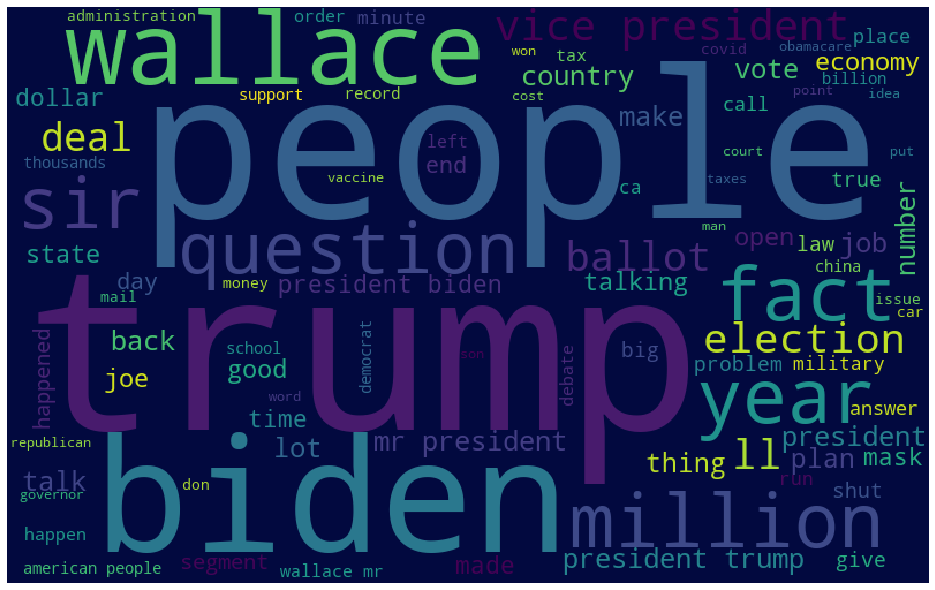

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Converts each token into lowercase 
comment_words_2020 = '' 
for i in range(len(filewords_2020)): 
    filewords_2020[i] = filewords_2020[i].lower() 

comment_words_2020 += " ".join(filewords_2020)+" "
    
wordcloud_2020 = WordCloud(width = 800, height = 500, 
                background_color ='#02093F', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words_2020) 
  
# plot the WordCloud                       
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(wordcloud_2020) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## 2016 - 1st Presidential Debate | Word cloud

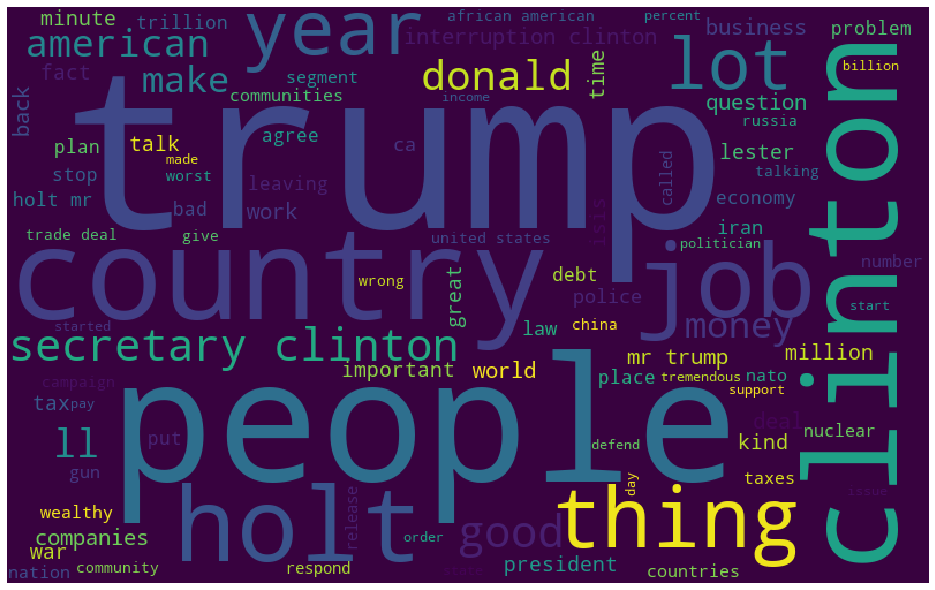

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Converts each token into lowercase 
comment_words_2016 = '' 
for i in range(len(filewords_2016)): 
    filewords_2016[i] = filewords_2016[i].lower() 

comment_words_2016 += " ".join(filewords_2016)+" "
    
wordcloud_2016 = WordCloud(width = 800, height = 500, 
                background_color ='#38023F', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words_2016) 
  
# plot the WordCloud                       
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(wordcloud_2016) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Summary

* In this exercise, two complete transcripts from 2016 and 2020 US election's 1st presidential debates were analyzed. Both, files were extracted from Web sources.After extraction, each files were processed for NLTK tokenization. Pre-processing steps include, converting to lower case, removal of punctuations,  words with internal hyphens or apostrophes, words with aplha-numeric characters etc. In addition,both custom stop words and stop words from NLTK libraries were applied to filter out unwanted texts.  
* Later, the tokens were analyzed for top frequencies, and ngrams. With ngrams analysis, BigramCollocationFinder has been extensively used to analyze the two words that repeated more often.Intrestingly, both elections had differnt combination of bigrams topping the list highlighting the central issues from both debates.Bigrams with mutual information scores support the same.
* Ex. In 2016 US elections Mr. Donald Trump's arguements on border control, jobs for american people were well received and resulted in favor.
* However, 2020 - Vice President Biden's arguements on climate change, economy, afortable health care plans for middle class and tax bills may favor him. However, law enforcement may still remain as challenge for both parties.
* Overall, NLTK library's word tokenizer, regexp tokenizer, stop words, ngrams &  PMI scores helped analyzed the raw text from differnt sources. Wordcloud was presented as well on top of each data sets.Further, stemming , sentiment analysis and classifier models can be performed for better analysis for NLP.   
    